In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("dataset/BankCustomerSegmentation(1M+ Transactions)/bank_transactions.csv")
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [4]:
data.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [5]:
data.drop(["TransactionID"],axis=1,inplace=True)
data[data.CustomerDOB.isna()]

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
222,C9022645,NaN,M,BHIWANDI,1730.30,21/10/16,150814,4000.0
1495,C2515550,NaN,M,NEW DELHI,384.07,21/10/16,193326,2800.0
2574,C1934132,NaN,F,MUMBAI,34058.49,21/10/16,152147,1800.0
3048,C2313633,NaN,M,NEW DELHI,29854.14,21/10/16,154905,480.0
3085,C8585549,NaN,M,GURGAON,44226.67,21/10/16,192917,11900.0
...,...,...,...,...,...,...,...,...
1047248,C8510525,NaN,M,ZIRAKPUR,98896.96,18/9/16,5852,3000.0
1047762,C3827041,NaN,M,PUNE,91.36,18/9/16,193122,284.0
1047919,C2427054,NaN,M,PUNE,91.36,18/9/16,201925,365.0
1048152,C8138543,NaN,F,REIS MAGOS BARDEZ,2630.67,18/9/16,181307,252.0


In [6]:
data.CustGender.fillna(data.CustGender.mode().values[0],inplace=True)
data.CustLocation.fillna(data.CustLocation.mode().values[0],inplace=True)
data.CustAccountBalance.fillna(data.CustAccountBalance.median(),inplace=True)

In [7]:
dy = str(int(pd.Series([int(i.split("/")[-3]) for i in data.CustomerDOB.dropna().values]).mode().values[0]))
mn = str(int(pd.Series([int(i.split("/")[-2]) for i in data.CustomerDOB.dropna().values]).mode().values[0]))
yr = str(int(pd.Series([int(i.split("/")[-1]) for i in data.CustomerDOB.dropna().values]).mode().values[0]))
data.CustomerDOB.fillna(dy + "/" + mn + "/" + yr,inplace=True)

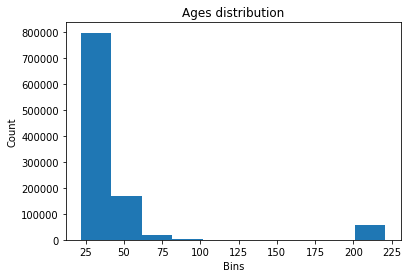

In [8]:
import datetime
ages = []
months = [int(i.split("/")[-2]) for i in data.CustomerDOB.values]
years = [int(i.split("/")[-1]) for i in data.CustomerDOB.values]
for i  in years:
    if(len(str(i))) == 4:
        ages.append(2021 - i)
    else:
        ages.append(2021 - (1900 + i))
plt.hist(ages)
plt.title("Ages distribution")
plt.xlabel("Bins")
plt.ylabel("Count")
plt.show()

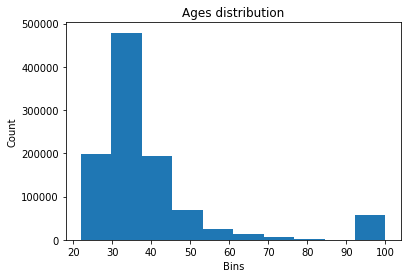

In [9]:
for i in range(len(ages)):
    if ages[i] > 100:
        ages[i] = 100

plt.hist(ages)
plt.title("Ages distribution")
plt.xlabel("Bins")
plt.ylabel("Count")
plt.show()

In [10]:
data["CustomerAge"] = ages

In [12]:
from datetime import datetime
tr_d = [i.split("/")[0] for i in data.TransactionDate.values]
tr_m = [i.split("/")[1] for i in data.TransactionDate.values]
tr_y = [i.split("/")[2] for i in data.TransactionDate.values]
dow = [datetime(int(tr_d[i]),int(tr_m[i]),int(tr_y[i])).strftime("%A") for i in range(len(tr_d))]

data["TransactionDay"] = tr_d
data["TransactionMonth"] = tr_m
data["TransactionYear"] = tr_y
data["TransactionDOW"] = dow

In [13]:
hh = [int(datetime.fromtimestamp(i).strftime("%H")) for i in data.TransactionTime.values]

time = []
for i in hh:
    if i >=0 and i < 13:
        time.append("Morning")
    elif i >= 13 and i<=17:
        time.append("Afternoon")
    elif i > 17 and i <= 19:
        time.append("Evening")
    elif i > 19:
        time.append("Night")

data["TransactionHourOfDay"] = hh
data["TransactionTimeOfDay"] = time

In [14]:
data.drop(["CustomerDOB"],inplace=True,axis=1)

data

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDay,TransactionMonth,TransactionYear,TransactionDOW,TransactionHourOfDay,TransactionTimeOfDay
0,C5841053,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,27,2,8,16,Friday,16,Afternoon
1,C2142763,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,64,2,8,16,Friday,16,Afternoon
2,C4417068,F,MUMBAI,17874.44,2/8/16,142712,459.0,25,2,8,16,Friday,16,Afternoon
3,C5342380,F,MUMBAI,866503.21,2/8/16,142714,2060.0,48,2,8,16,Friday,16,Afternoon
4,C9031234,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,33,2,8,16,Friday,3,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,C8020229,M,NEW DELHI,7635.19,18/9/16,184824,799.0,31,18,9,16,Sunday,4,Morning
1048563,C6459278,M,NASHIK,27311.42,18/9/16,183734,460.0,29,18,9,16,Sunday,4,Morning
1048564,C6412354,M,HYDERABAD,221757.06,18/9/16,183313,770.0,32,18,9,16,Sunday,3,Morning
1048565,C6420483,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,43,18,9,16,Sunday,4,Morning


In [17]:
cnames = {
'aqua': '#00FFFF',
'aquamarine': '#7FFFD4',
'bisque': '#FFE4C4',
'black': '#000000',
'blanchedalmond': '#FFEBCD',
'blue': '#0000FF',
'blueviolet': '#8A2BE2',
'brown': '#A52A2A',
'burlywood': '#DEB887',
'cadetblue': '#5F9EA0',
'chartreuse': '#7FFF00',
'chocolate': '#D2691E',
'coral': '#FF7F50',
'cornflowerblue': '#6495ED',
'crimson': '#DC143C',
'cyan': '#00FFFF',
'darkblue': '#00008B',
'darkcyan': '#008B8B',
'darkgoldenrod': '#B8860B',
'darkgray': '#A9A9A9',
'darkgreen': '#006400',
'darkkhaki': '#BDB76B',
'darkmagenta': '#8B008B',
'darkolivegreen': '#556B2F',
'darkorange': '#FF8C00',
'darkorchid': '#9932CC',
'darkred': '#8B0000',
'darksalmon': '#E9967A',
'darkseagreen': '#8FBC8F',
'darkslateblue': '#483D8B',
'darkslategray': '#2F4F4F',
'darkturquoise': '#00CED1',
'darkviolet': '#9400D3',
'deeppink': '#FF1493',
'deepskyblue': '#00BFFF',
'dodgerblue': '#1E90FF',
'firebrick': '#B22222',
'forestgreen': '#228B22',
'fuchsia': '#FF00FF',
'gainsboro': '#DCDCDC',
'gold': '#FFD700',
'goldenrod': '#DAA520',
'gray': '#808080',
'green': '#008000',
'greenyellow': '#ADFF2F',
'hotpink': '#FF69B4',
'indianred': '#CD5C5C',
'indigo': '#4B0082',
'khaki': '#F0E68C',
'lavender': '#E6E6FA',
'lawngreen': '#7CFC00',
'lightcoral': '#F08080',
'lightcyan': '#E0FFFF',
'lightgreen': '#90EE90',
'lightsalmon': '#FFA07A',
'lightseagreen': '#20B2AA',
'lightskyblue': '#87CEFA',
'lightsteelblue': '#B0C4DE',
'lime': '#00FF00',
'limegreen': '#32CD32',
'linen': '#FAF0E6',
'magenta': '#FF00FF',
'maroon': '#800000',
'mediumaquamarine': '#66CDAA',
'mediumblue': '#0000CD',
'mediumorchid': '#BA55D3',
'mediumpurple': '#9370DB',
'mediumseagreen': '#3CB371',
'mediumslateblue': '#7B68EE',
'mediumspringgreen': '#00FA9A',
'mediumturquoise': '#48D1CC',
'mediumvioletred': '#C71585',
'midnightblue': '#191970',
'mistyrose': '#FFE4E1',
'moccasin': '#FFE4B5',
'navy': '#000080',
'olive': '#808000',
'olivedrab': '#6B8E23',
'orange': '#FFA500',
'orangered': '#FF4500',
'orchid': '#DA70D6',
'palegoldenrod': '#EEE8AA',
'palegreen': '#98FB98',
'paleturquoise': '#AFEEEE',
'palevioletred': '#DB7093',
'papayawhip': '#FFEFD5',
'peachpuff': '#FFDAB9',
'peru': '#CD853F',
'pink': '#FFC0CB',
'plum': '#DDA0DD',
'powderblue': '#B0E0E6',
'purple': '#800080',
'red': '#FF0000',
'rosybrown': '#BC8F8F',
'royalblue': '#4169E1',
'saddlebrown': '#8B4513',
'salmon': '#FA8072',
'sandybrown': '#FAA460',
'seagreen': '#2E8B57',
'sienna': '#A0522D',
'silver': '#C0C0C0',
'skyblue': '#87CEEB',
'slateblue': '#6A5ACD',
'slategray': '#708090',
'springgreen': '#00FF7F',
'steelblue': '#4682B4',
'tan': '#D2B48C',
'teal': '#008080',
'thistle': '#D8BFD8',
'tomato': '#FF6347',
'turquoise': '#40E0D0',
'violet': '#EE82EE',
'yellow': '#FFFF00',
'yellowgreen': '#9ACD32'}
colors = list(cnames.keys())

In [18]:
plt.rcParams["axes.linewidth"]  = 0
plt.rcParams.update({'axes.facecolor':'whitesmoke'})

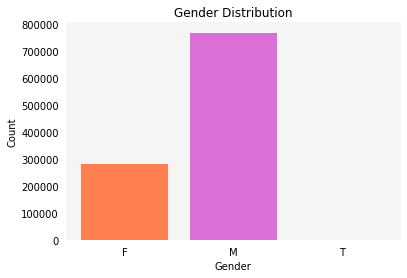

In [19]:
random.shuffle(colors)
un, count = np.unique(data.CustGender,return_counts=True)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
plt.bar(un,count,color=colors)
plt.show()

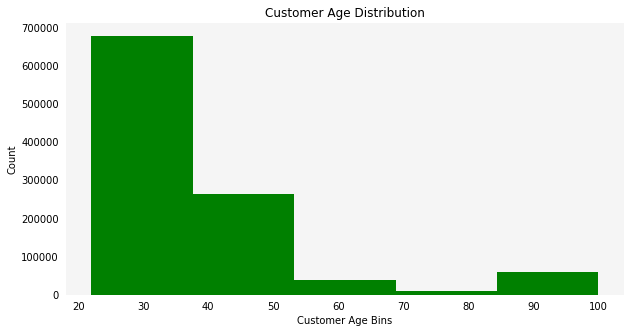

In [20]:
plt.figure(figsize=(10,5))
plt.title("Customer Age Distribution")
plt.xlabel("Customer Age Bins")
plt.ylabel("Count")
plt.hist(data.CustomerAge,bins=5,color="green")
plt.tick_params(bottom=False,left=False)
plt.ticklabel_format(style='plain')
plt.show()

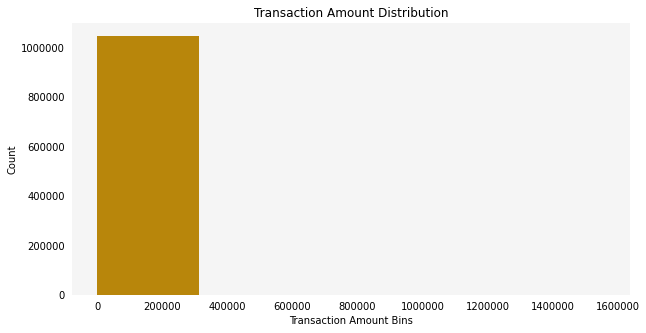

In [22]:
plt.figure(figsize=(10,5))
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount Bins")
plt.ylabel("Count")
plt.hist(data["TransactionAmount (INR)"],bins=5,color="darkgoldenrod")
plt.tick_params(bottom=False,left=False)
plt.ticklabel_format(style='plain')
plt.show()

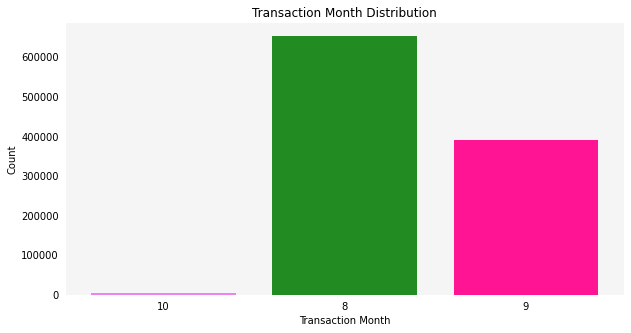

In [23]:
random.shuffle(colors)
plt.figure(figsize=(10,5))
un, count = np.unique(data.TransactionMonth,return_counts=True)
plt.title("Transaction Month Distribution")
plt.xlabel("Transaction Month")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
plt.bar(un, count,color=colors)
plt.show()

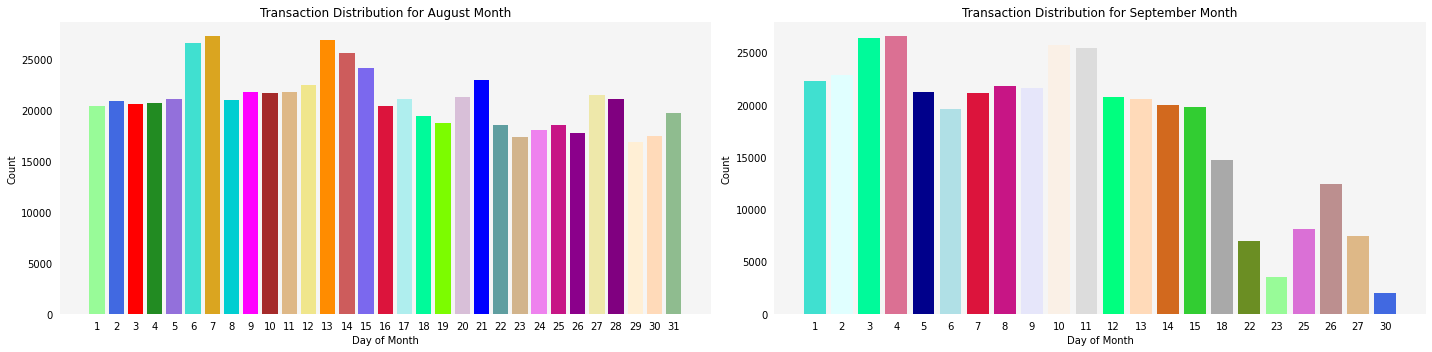

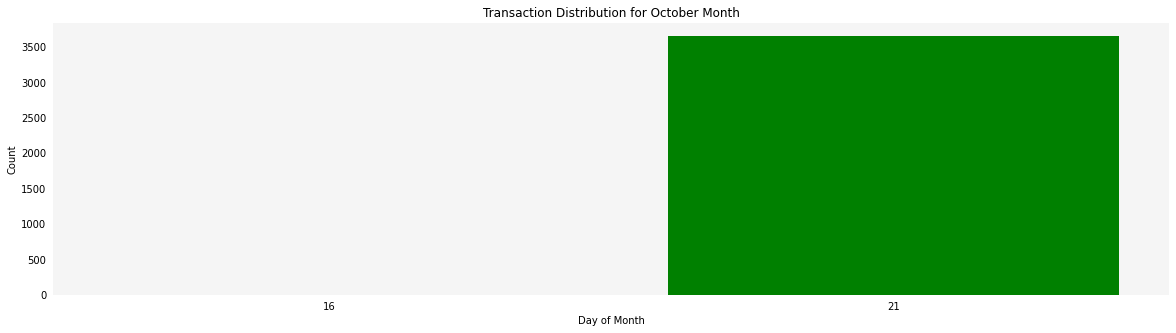

In [25]:
plt.figure(figsize=(20,5))
random.shuffle(colors)
plt.subplot(1,2,1)
plt.xlabel("Day of Month")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
plt.title("Transaction Distribution for August Month")
un, count = np.unique(data[data.TransactionMonth == '8'].TransactionDay.values,return_counts=True)
un, count = zip(*sorted(zip([int(i) for i in un], count)))
plt.bar([str(i) for i in un],count,color=colors)

plt.subplot(1,2,2)
random.shuffle(colors)
un, count = np.unique(data[data.TransactionMonth == '9'].TransactionDay.values,return_counts=True)
un, count = zip(*sorted(zip([int(i) for i in un], count)))
plt.xlabel("Day of Month")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
plt.title("Transaction Distribution for September Month")
plt.bar([str(i) for i in un],count,color=colors)
plt.tight_layout()

plt.figure(figsize=(20,5))
random.shuffle(colors)
un, count = np.unique(data[data.TransactionMonth == '10'].TransactionDay.values,return_counts=True)
un, count = zip(*sorted(zip([int(i) for i in un], count)))
plt.xlabel("Day of Month")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
plt.title("Transaction Distribution for October Month")
plt.bar([str(i) for i in un],count,color=["aqua","green"])
plt.show()

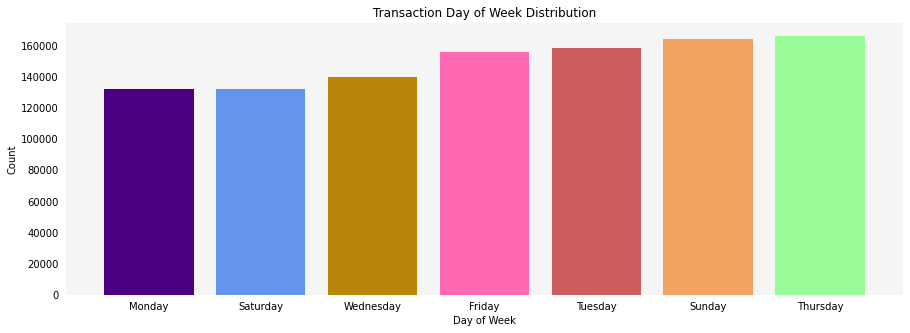

In [28]:
plt.figure(figsize=(15,5))
random.shuffle(colors)
un, count = np.unique(data.TransactionDOW.values,return_counts=True)
count, un = zip(*sorted(zip(count, un)))
plt.title("Transaction Day of Week Distribution")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
plt.bar(un, count, color=colors)
plt.show()

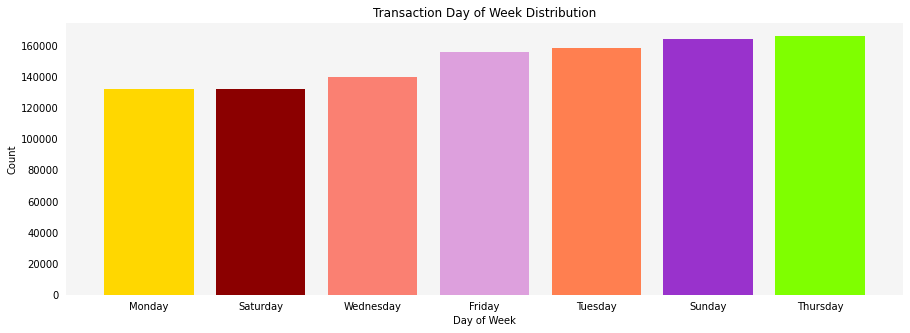

In [29]:
plt.figure(figsize=(15,5))
random.shuffle(colors)
un, count = np.unique(data.TransactionDOW.values,return_counts=True)
count, un = zip(*sorted(zip(count, un)))
plt.title("Transaction Day of Week Distribution")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
plt.bar(un, count, color=colors)
plt.show()

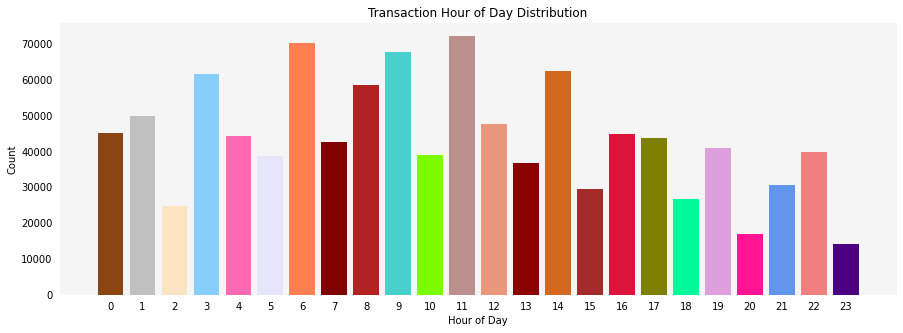

In [30]:
plt.figure(figsize=(15,5))
random.shuffle(colors)
un, count = np.unique(data.TransactionHourOfDay.values.astype('int32'),return_counts=True)
un, count = zip(*sorted(zip(un, count)))
plt.title("Transaction Hour of Day Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
plt.bar([str(i) for i in un], count, color=colors)
plt.show()

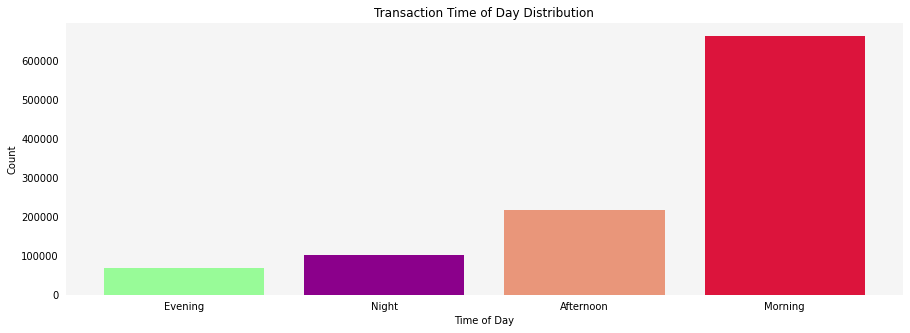

In [31]:
plt.figure(figsize=(15,5))
random.shuffle(colors)
un, count = np.unique(data.TransactionTimeOfDay.values,return_counts=True)
count, un = zip(*sorted(zip(count, un)))
plt.title("Transaction Time of Day Distribution")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
plt.bar(un, count, color=colors)
plt.show(

)